<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br>


In [5]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [6]:
# Your code here
from bs4 import BeautifulSoup
import requests

Download the webpage at the url


In [7]:
#your code goes
data  = requests.get(url).text

Create a soup object


In [8]:
#your code goes here
soup = BeautifulSoup(data,"html5lib")

Scrape the `Language name` and `annual average salary`.


In [9]:
#your code goes here
table = soup.find('table')
for row in table.find_all('tr'):
    cols = row.find_all('td')
    Language_name = cols[1].getText()
    annual_average_salary = cols[3].getText()
    print("{}--->{}".format(Language_name,annual_average_salary))

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


Save the scrapped data into a file named *popular-languages.csv*


In [44]:
language = []
Avg_Annual_Sal = []
table2 = soup.find('table')
for row2 in table.find_all('tr'):
    cols = row2.find_all('td')
    Language_name = cols[1].getText()
    annual_average_salary = cols[3].getText()
    language.append(Language_name)
    Avg_Annual_Sal.append(annual_average_salary)

import pandas as pd
H1 = language[0]
H2 = Avg_Annual_Sal[0]
df = pd.DataFrame({H1: language, H2: Avg_Annual_Sal})
df = df.drop([0])
df = df.reset_index(drop=True)
df




,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


In [102]:
#df['Average Annual Salary'] = df['Average Annual Salary'].str.replace('[\$,]', '', regex=True).astype(int)
df2 = df.sort_values(by='Average Annual Salary')
df2

,Language,Average Annual Salary
7,PHP,84727
8,SQL,84793
6,C#,88726
2,R,92037
9,Go,94082
1,Java,101013
3,Javascript,110981
5,C++,113865
0,Python,114383
4,Swift,130801


In [23]:
# your code goes here
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/popular-languages.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

Mounted at /content/drive


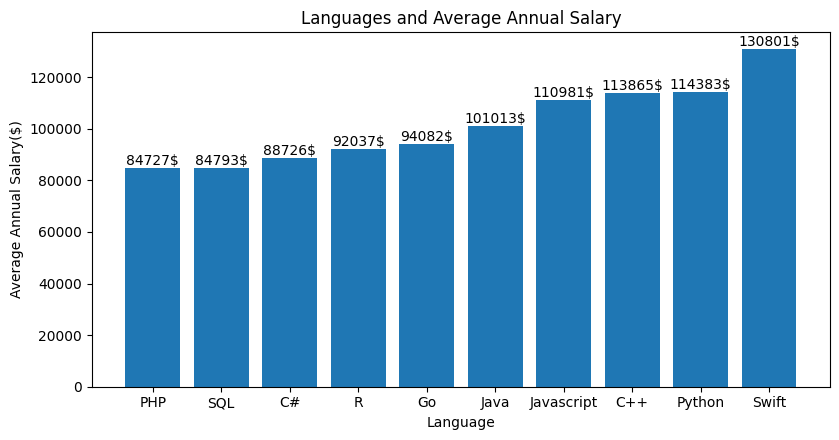

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8.50, 4.50]
plt.rcParams["figure.autolayout"] = True
plt.bar(df2['Language'], df2['Average Annual Salary'])
plt.xlabel('Language')
plt.ylabel('Average Annual Salary($)')
plt.title('Languages and Average Annual Salary')
#plt.xlim([-10, 20])
for i, v in enumerate(df2['Average Annual Salary']):
    plt.text(i, v, str(v)+'$', ha='center', va='bottom')
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
